## Supervised Machine Learning - Prediction of Breast Cancer Diagnosis as Benign or Malignant.

### Data Cleaning

#### Importation of Dependencies -- Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns # how about as sbn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset from csv to data frame
df = pd.read_csv('data.csv')

# View the first 5 records
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Check for the number of columns and rows 
df.shape

(569, 33)

In [4]:
# Check for missing values
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
# Are all columns maintaining correct data types?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# check for duplicate records?
df.duplicated().sum()

0

In [7]:
# Removing columns like id and Unnamed which are not needed for my analysis
df.drop(columns = ['id', 'Unnamed: 32'], inplace = True)

### Data preprocessing 

#### Importation of Dependencies

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

In [9]:
# defining the encoder and encoding the target variable(M,B) as numeric for easy machine learning
le = LabelEncoder()
df['Target'] = le.fit_transform(df['diagnosis'])
df.sample()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Target
37,B,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,0


Please, note that M (Malignant) is now 1 and B(Benign) is now 0.

In [10]:
# dropping the diagnosis column since its no longer useful

df = df.drop(columns = 'diagnosis')
df.sample()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Target
467,9.668,18.1,61.06,286.3,0.08311,0.05428,0.01479,0.005769,0.168,0.06412,...,24.62,71.11,380.2,0.1388,0.1255,0.06409,0.025,0.3057,0.07875,0


In [11]:
# Splitting our data into Predictors(X) and Target(y)
y = df['Target']
X = df.drop(columns = 'Target')

# Division of X and y into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.20, random_state = 1000, stratify = y)

# Confirming splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

### Data Modelling & Evaluation

#### Importing Dependencies

In [12]:
# Importing 4 different models

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [13]:
# defining model 1
dtc = DecisionTreeClassifier(max_depth = 2)

# Training the model
dtc.fit(X_train, y_train)

# Checking the performance of the model on both training and test sets
from sklearn.metrics import balanced_accuracy_score 
balanced_accuracy_score(y_test, dtc.predict(X_test)), balanced_accuracy_score(y_train, dtc.predict(X_train))

(0.9186507936507937, 0.9367389060887513)

In [14]:
# defining model 2
lr = LogisticRegression()

# Training the model
lr.fit(X_train, y_train)

# Checking the performance of the model on both training and test sets
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, lr.predict(X_test)), balanced_accuracy_score(y_train, lr.predict(X_train))

(0.9742063492063492, 0.9383384932920537)

..... How about we make decision on the best model using cross validation?

### Cross Validation

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
# list of models
models = [LogisticRegression(), SVC(), KNeighborsClassifier(), DecisionTreeClassifier()]

In [17]:
def model_cross_validation (): #is the space necessary?
    
    for model in models:
        cv_score = cross_val_score(model, X, y, cv = 5)
        mean_percent = cv_score.mean() * 100 
        std_percent = cv_score.std() * 100
        print('Cross Validation Mean Score for', model, 'is', mean_percent)
        print('Cross Validation Std. Score for', model, 'is', std_percent )
        print('--------------------------')

In [18]:
model_cross_validation()

Cross Validation Mean Score for LogisticRegression() is 94.3766495885732
Cross Validation Std. Score for LogisticRegression() is 0.8910983455061453
--------------------------
Cross Validation Mean Score for SVC() is 91.21720229777983
Cross Validation Std. Score for SVC() is 3.544367440584207
--------------------------
Cross Validation Mean Score for KNeighborsClassifier() is 92.79459711224965
Cross Validation Std. Score for KNeighborsClassifier() is 2.176276406544814
--------------------------
Cross Validation Mean Score for DecisionTreeClassifier() is 92.43906225741345
Cross Validation Std. Score for DecisionTreeClassifier() is 2.2078387134735906
--------------------------


.... We will make use of KNeighborsClassifier model because of its higher mean score as well as least deviation
     as opposed to Logistic Regression which is better but cant be good for smaller dataset......

### GridSearchCV

##### We need to choose the best parameters for our chosen model.

In [19]:
# load the KNearest classifier model
knnc = KNeighborsClassifier()

In [20]:
# loading parameters grid
from sklearn.model_selection import ParameterGrid

# listing out our parameters
param_grid = {'n_neighbors' : [2, 3, 4, 5, 6, 7, 8, 9] }

#viewing
list(ParameterGrid(param_grid))

[{'n_neighbors': 2},
 {'n_neighbors': 3},
 {'n_neighbors': 4},
 {'n_neighbors': 5},
 {'n_neighbors': 6},
 {'n_neighbors': 7},
 {'n_neighbors': 8},
 {'n_neighbors': 9}]

In [21]:
# importing grid search cv
from sklearn.model_selection import GridSearchCV

# Loading our model
gs_CV = GridSearchCV(knnc, param_grid, cv = 5, return_train_score = True)

# Training the model
gs_results = gs_CV.fit(X_train, y_train)

# putting our results into data frame
gs_df = pd.DataFrame(gs_results.cv_results_)

gs_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [22]:
# calling out wanted columns
gs_df[['param_n_neighbors', 'params', 'mean_test_score', 'std_test_score', 'mean_train_score',
       'std_train_score', 'rank_test_score'
]].sort_values('rank_test_score')

,param_n_neighbors,params,mean_test_score,std_test_score,mean_train_score,std_train_score,rank_test_score
2,4,{'n_neighbors': 4},0.927473,0.008791,0.935714,0.002198,1
4,6,{'n_neighbors': 6},0.927473,0.020382,0.935165,0.004464,2
7,9,{'n_neighbors': 9},0.925275,0.022413,0.934066,0.005213,3
3,5,{'n_neighbors': 5},0.925275,0.016150,0.938462,0.005095,4
1,3,{'n_neighbors': 3},0.920879,0.014579,0.947253,0.005867,5
5,7,{'n_neighbors': 7},0.920879,0.023466,0.936813,0.006729,5
6,8,{'n_neighbors': 8},0.916484,0.025631,0.931868,0.004727,7
0,2,{'n_neighbors': 2},0.912088,0.012038,0.942308,0.006265,8


In [23]:
#Checking for best parameter
gs_results.best_params_ , gs_results.best_estimator_

({'n_neighbors': 4}, KNeighborsClassifier(n_neighbors=4))

#### Prediction with chosen model - KNeighborsClassifier

In [24]:
knnc = KNeighborsClassifier(n_neighbors = 4)

knnc.fit(X_train, y_train)
y_pred = knnc.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0])

In [25]:
# viewing the fraction and accuracy of our predictions

from sklearn.metrics import balanced_accuracy_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report

cm = confusion_matrix(y_test, y_pred, normalize='true')
cm , accuracy_score(y_test, y_pred)

(array([[0.97222222, 0.02777778],
        [0.07142857, 0.92857143]]),
 0.956140350877193)

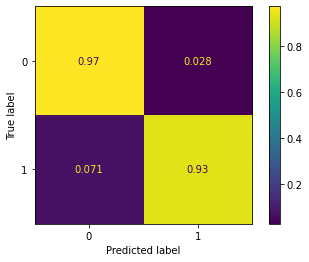

In [26]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

Malignant: 1  Benign: 0